In [46]:
import os
import cv2
import dlib
import numpy as np
import argparse
from contextlib import contextmanager
from wide_resnet import WideResNet
from keras.utils.data_utils import get_file
from matplotlib import pyplot as plt

%matplotlib inline

In [47]:
pretrained_model = "https://github.com/yu4u/age-gender-estimation/releases/download/v0.5/weights.18-4.06.hdf5"

modhash = '89f56a39a78454e96379348bddd78c0d'

weight_file = get_file("weights.18-4.06.hdf5", pretrained_model, cache_subdir="pretrained_models",
                               file_hash=modhash)

In [170]:
img_size = 64
depth=16
width=8
margin=0.4
model = WideResNet(img_size, depth=depth, k=width)()
model.load_weights(weight_file)

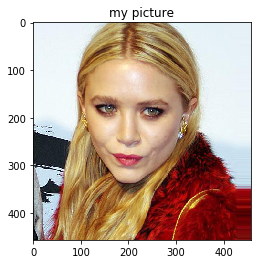

In [171]:
testImg = "/Users/HillOfFlame/NLP_InfoSys/XAIpoint/age-gender-estimation/SmallData/wiki_crop/00/test2.jpg"
img=cv2.imread(testImg)
input_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display Image InLine
plt.imshow(input_img)
plt.title('my picture')
plt.show()

img_h, img_w, _ = np.shape(input_img)

In [68]:
zxcvbn = np.asarray([input_img])
zxcvbn.shape


(1, 457, 457, 3)

In [5]:
# detect faces using dlib detector
detector = dlib.get_frontal_face_detector()
detected = detector(input_img, 1)
faces = np.empty((len(detected), img_size, img_size, 3))

if len(detected) > 0:
    for i, d in enumerate(detected):
        x1, y1, x2, y2, w, h = d.left(), d.top(), d.right() + 1, d.bottom() + 1, d.width(), d.height()
        xw1 = max(int(x1 - margin * w), 0)
        yw1 = max(int(y1 - margin * h), 0)
        xw2 = min(int(x2 + margin * w), img_w - 1)
        yw2 = min(int(y2 + margin * h), img_h - 1)
        cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
        # cv2.rectangle(img, (xw1, yw1), (xw2, yw2), (255, 0, 0), 2)
        faces[i, :, :, :] = cv2.resize(img[yw1:yw2 + 1, xw1:xw2 + 1, :], (img_size, img_size))

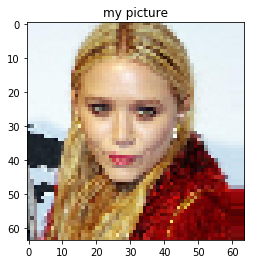

In [71]:
zzz = cv2.resize(input_img, (img_size, img_size))

imgX = zxcvbn[0,:,:,:]
# Display Image InLine
plt.imshow(zzz)
plt.title('my picture')
plt.show()

In [73]:
t = np.asarray([zzz])

results = model.predict(t)

print(results)

[array([[0.99182385, 0.00817615]], dtype=float32), array([[2.89180825e-05, 1.65091289e-04, 1.35646435e-04, 2.60204797e-05,
        1.60489784e-04, 2.38639026e-04, 5.99385181e-04, 1.05591235e-03,
        6.95458788e-04, 8.83562607e-04, 1.41376210e-03, 5.73617034e-03,
        4.61436296e-03, 1.34109873e-02, 1.57601219e-02, 3.16417441e-02,
        2.04976331e-02, 4.28551920e-02, 5.65684773e-02, 9.57688317e-02,
        6.17384352e-02, 4.31933887e-02, 1.70263171e-01, 8.16886052e-02,
        1.08782202e-01, 5.99902496e-02, 6.08631149e-02, 2.80165300e-02,
        2.96769701e-02, 1.86657850e-02, 1.17258467e-02, 5.14196558e-03,
        5.62750641e-03, 3.23986472e-03, 3.08699231e-03, 2.76472443e-03,
        4.14024387e-03, 1.64517947e-03, 6.87376072e-04, 5.77000028e-04,
        6.67678309e-04, 3.33916221e-04, 3.62652441e-04, 3.22772859e-04,
        2.94317579e-04, 3.04724730e-04, 3.51796800e-04, 2.18627625e-04,
        2.07059318e-04, 1.64245241e-04, 1.68463230e-04, 8.44915994e-05,
        1.598

In [8]:
print(results)
len(results[1][0])

[array([[9.9930584e-01, 6.9414236e-04]], dtype=float32), array([[1.91819504e-06, 1.62173637e-05, 1.05133331e-05, 2.08499455e-06,
        1.70800304e-05, 1.32130090e-05, 2.61952373e-05, 4.24635909e-05,
        2.12225350e-05, 3.09245188e-05, 3.78865116e-05, 2.87421426e-04,
        2.28980964e-04, 6.60287333e-04, 1.12962234e-03, 3.43196746e-03,
        1.99208013e-03, 5.06714638e-03, 1.88194718e-02, 3.03467121e-02,
        4.95737232e-02, 1.85714681e-02, 1.91765487e-01, 9.74639878e-02,
        1.51686326e-01, 1.08821265e-01, 8.58041421e-02, 5.70699163e-02,
        4.41499501e-02, 4.05943915e-02, 2.88197808e-02, 1.26810968e-02,
        2.42417045e-02, 7.93043710e-03, 6.50378922e-03, 2.51853629e-03,
        4.96776961e-03, 2.34609796e-03, 8.07960925e-04, 4.21763776e-04,
        2.61464331e-04, 1.58007635e-04, 1.04842227e-04, 6.91852474e-05,
        5.08908961e-05, 4.30076325e-05, 4.33259775e-05, 2.80181812e-05,
        2.60160359e-05, 1.63261157e-05, 1.38129935e-05, 8.87983424e-06,
       

101

In [74]:
# Interpret Results
m = max(results[1][0])
[i for i, j in enumerate(results[1][0]) if j == m]


[22]

In [94]:
r = Predictor(imgX)[0]
m = max(r)
[i for i, j in enumerate(r) if j == m]

[22]

In [115]:
# Creating the LIME input function

def Predictor(imgLst):
    # Must resize the image to 64 by 64
    img_size = 64
    ResizedImgLst = []
    for img in imgLst:
        resized = cv2.resize(img, (img_size, img_size))
        ResizedImgLst.append(resized)
    
    # Turn into Numpy Array
    ResizedImgLst = np.asarray(ResizedImgLst)
    
    # Then must add another dimension
    # imgAddDim = np.asarray([img])
    
    print('Printing')
    print(ResizedImgLst.shape)
    
    # Predict using pretrained model
    pred = model.predict(ResizedImgLst)
    
    # Strip out unnecessary data
    results = pred[1]
    
    return results


ans =Predictor(np.asarray([imgX]))







Printing
(1, 64, 64, 3)


In [15]:
# Using LIME to understand the predictions
%load_ext autoreload
%autoreload 2

import os,sys
try:
    import lime
except:
    sys.path.append(os.path.join('..', '..')) # add the current directory
    import lime
from lime import lime_image

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
explainer = lime_image.LimeImageExplainer()

In [194]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(zzz, Predictor, top_labels=5, hide_color=0, num_samples=1000)

Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)


In [195]:
from skimage.segmentation import mark_boundaries
print('wrapping up')

wrapping up


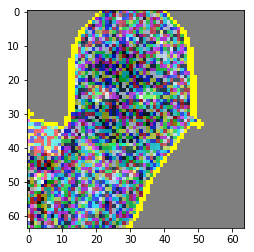

In [229]:
temp, mask = explanation.get_image_and_mask(23, positive_only=True, num_features=10000, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))

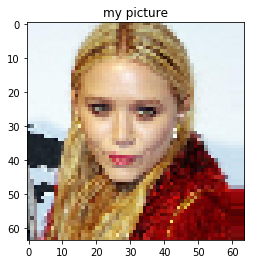

In [126]:
plt.imshow(zzz)
plt.title('my picture')
plt.show()

In [225]:
mark_boundaries(temp / 2 + 0.5, mask)

array([[[118.5, 122. , 126. ],
        [118.5, 122. , 126. ],
        [118.5, 122. , 126. ],
        ...,
        [  0.5,   0.5,   0.5],
        [  0.5,   0.5,   0.5],
        [  0.5,   0.5,   0.5]],

       [[118.5, 122. , 126. ],
        [118.5, 122. , 126. ],
        [118.5, 122. , 126. ],
        ...,
        [  0.5,   0.5,   0.5],
        [  0.5,   0.5,   0.5],
        [  0.5,   0.5,   0.5]],

       [[118.5, 122. , 126. ],
        [118. , 121.5, 125.5],
        [118. , 121.5, 125.5],
        ...,
        [  0.5,   0.5,   0.5],
        [  0.5,   0.5,   0.5],
        [  0.5,   0.5,   0.5]],

       ...,

       [[  1. ,   2. ,   7. ],
        [ 90. ,  93.5,  94.5],
        [ 71.5,  51. ,  48. ],
        ...,
        [ 62. ,   4. ,   5.5],
        [ 62. ,   4. ,   5.5],
        [ 62. ,   4. ,   5.5]],

       [[ 11.5,  13.5,  18. ],
        [ 87.5,  90.5,  95.5],
        [ 59. ,  41. ,  40.5],
        ...,
        [ 62. ,   7.5,   6.5],
        [ 62. ,   7.5,   6.5],
        [ 62. ,

In [139]:
min(mark_boundaries(temp / 2 + 0.5, mask)[0][0])

0.5

(457, 457, 3)

(64, 64, 3)

## Try to use GradBoost NoteBook

In [230]:
from lime.wrappers.scikit_image import SegmentationAlgorithm
explainer = lime_image.LimeImageExplainer(verbose = False)
segmenter = SegmentationAlgorithm('slic', n_segments=100, compactness=1, sigma=1)

In [232]:
%%time
explanation = explainer.explain_instance(zzz, classifier_fn = Predictor, top_labels=5, hide_color=0, num_samples=1000, segmentation_fn=segmenter)

Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)


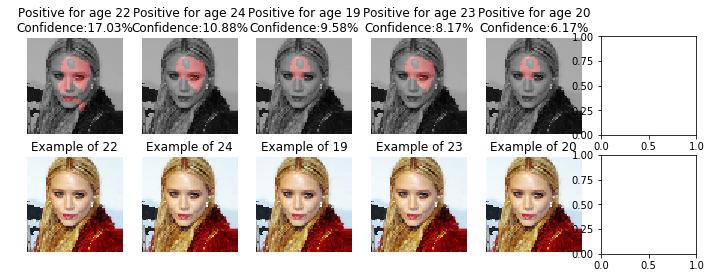

In [257]:
# now show them for each class
fig, m_axs = plt.subplots(2,6, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for age {}\nConfidence:{:2.2f}%'.format(i, 100*preds[i]))
    c_ax.axis('off')
    
    gt_ax.imshow(zzz)
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

In [236]:
print(explanation.top_labels)

[22, 24, 19, 23, 20]


In [243]:
preds = Predictor(np.asarray([zzz]))[0]

Printing
(1, 64, 64, 3)


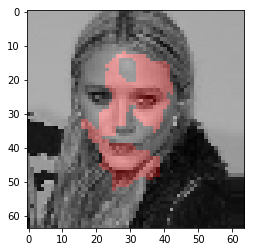

In [275]:
temp, mask = explanation.get_image_and_mask(22, positive_only=True, num_features=5, hide_rest=False)
plt.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')

In [344]:
## Next Step:  Make 10 year buckets

def bucketize(lst, n):
    newBuckets = []
    for i in range(int(len(lst)/n + 1)):
        newBuckets.append(sum(lst[i*n:i*n+n]))
    return newBuckets

def TenYearRangePredictor(imgLst):
    return AgePredicatorRange(imgLst, 10)

def FiveYearRangePredictor(imgLst):
    return AgePredicatorRange(imgLst, 5)

def AgePredicatorRange(imgLst, bucketSize):
    
    # Must resize the image to 64 by 64
    img_size = 64
    ResizedImgLst = []
    for img in imgLst:
        resized = cv2.resize(img, (img_size, img_size))
        ResizedImgLst.append(resized)
    
    # Turn into Numpy Array
    ResizedImgLst = np.asarray(ResizedImgLst)
    
    # Predict using pretrained model
    predLst = model.predict(ResizedImgLst)[1]
    
    results = []
    for pred in predLst:
        results.append(np.asarray(bucketize(pred, bucketSize)))

    return results



## Five Year Bucket Size

In [338]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(zzz, FiveYearRangePredictor, top_labels=5, hide_color=0, num_samples=1000)
print('Finished')

Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)
Printing
(10, 64, 64, 3)


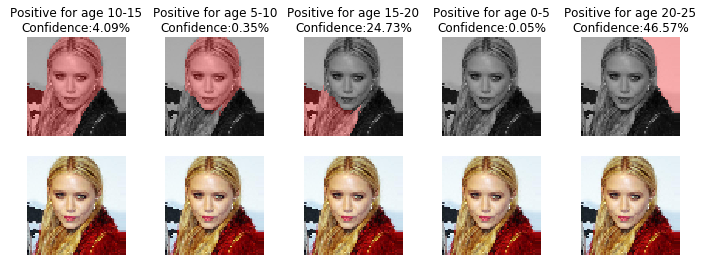

In [357]:
bucketSize = 5
confidence = bucketize(preds, bucketSize)

#now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for age {}-{}\nConfidence:{:2.2f}%'.format(i*bucketSize, (i+1)*bucketSize, 100*confidence[i]))
    c_ax.axis('off')
    
    gt_ax.imshow(zzz)
    gt_ax.axis('off')

## Ten Year BucketSize

In [354]:
%%time
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation = explainer.explain_instance(zzz, TenYearRangePredictor, top_labels=5, hide_color=0, num_samples=1000)
print('Finished')

Finished
CPU times: user 12min 22s, sys: 35 s, total: 12min 57s
Wall time: 3min 54s


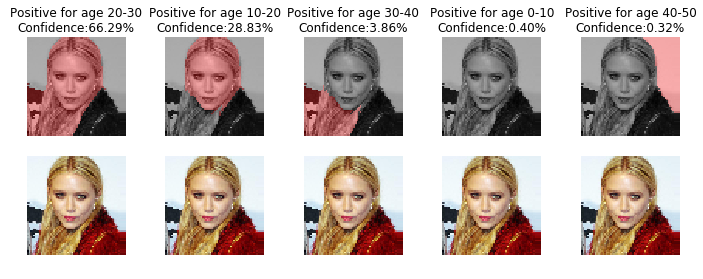

In [358]:
bucketSize = 10
confidence = bucketize(preds, bucketSize)

#now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation.top_labels, m_axs.T):
    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for age {}-{}\nConfidence:{:2.2f}%'.format(i*bucketSize, (i+1)*bucketSize, 100*confidence[i]))
    c_ax.axis('off')
    
    gt_ax.imshow(zzz)
    gt_ax.axis('off')

# Trying Other Sample Photos 

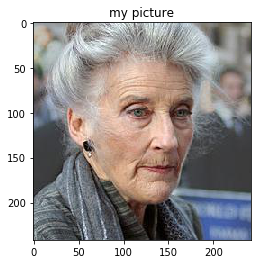

In [374]:
photo8 = "/Users/HillOfFlame/NLP_InfoSys/XAIpoint/age-gender-estimation/SmallData/wiki_crop/00/test8.jpg"
img=cv2.imread(photo8)
input_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Display Image InLine
plt.imshow(input_img)
plt.title('my picture')
plt.show()

img_h, img_w, _ = np.shape(input_img)

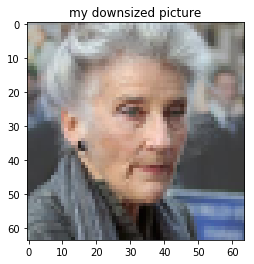

In [385]:
zzz8 = cv2.resize(input_img, (img_size, img_size), interpolation=cv2.INTER_AREA)

imgX = zxcvbn[0,:,:,:]
# Display Image InLine
plt.imshow(zzz8)
plt.title('my downsized picture')
plt.show()

## Five Year Buckets

In [389]:
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation8_5 = explainer.explain_instance(zzz8, FiveYearRangePredictor, top_labels=5, hide_color=0, num_samples=1000)

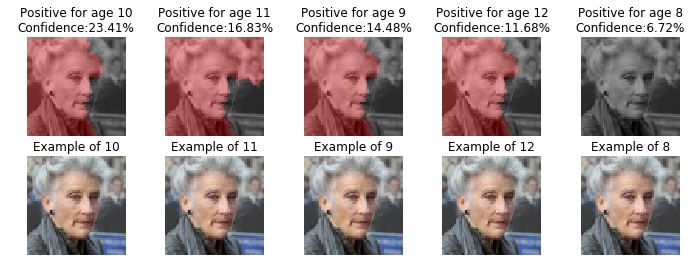

In [390]:
# Locate Model Predictions
preds=FiveYearRangePredictor(np.asarray([zzz8]))[0]

# now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation8_5.top_labels, m_axs.T):
    temp, mask = explanation8_5.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for age {}\nConfidence:{:2.2f}%'.format(i, 100*preds[i]))
    c_ax.axis('off')
    
    gt_ax.imshow(zzz8)
    gt_ax.set_title('Example of {}'.format(i))
    gt_ax.axis('off')

## Ten Year Buckets

In [391]:
# Hide color is the color for a superpixel turned OFF. Alternatively, if it is NONE, the superpixel will be replaced by the average of its pixels
explanation8_10 = explainer.explain_instance(zzz8, TenYearRangePredictor, top_labels=5, hide_color=0, num_samples=1000)

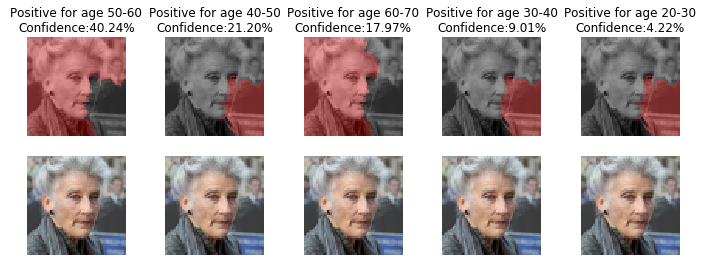

In [401]:
preds=TenYearRangePredictor(np.asarray([zzz8]))[0]

bucketSize = 10

# now show them for each class
fig, m_axs = plt.subplots(2,5, figsize = (12,4))
for i, (c_ax, gt_ax) in zip(explanation8_10.top_labels, m_axs.T):
    temp, mask = explanation8_10.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
    c_ax.imshow(label2rgb(mask,temp, bg_label = 0), interpolation = 'nearest')
    c_ax.set_title('Positive for age {}-{}\nConfidence:{:2.2f}%'.format(i*bucketSize, (i+1)*bucketSize, 100*preds[i]))
    c_ax.axis('off')
    
    gt_ax.imshow(zzz8)
    gt_ax.axis('off')

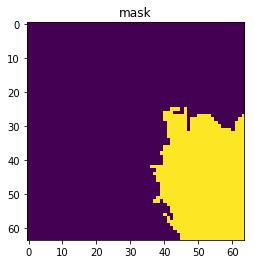

In [404]:

# Display Image InLine
plt.imshow(mask)
plt.title('mask')
plt.show()

In [399]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 1, 1, 1]])

In [406]:
import os
import cv2
import dlib
import numpy as np
import argparse
from contextlib import contextmanager
from wide_resnet import WideResNet
from keras.utils.data_utils import get_file
import skimage
from skimage.color import label2rgb
from skimage.segmentation import mark_boundaries
import lime
from lime import lime_image
from lime.wrappers.scikit_image import SegmentationAlgorithm

def main():
	classifier = AgeClassify()
	ans = classifier.process("/Users/HillOfFlame/NLP_InfoSys/XAIpoint/age-gender-estimation/SmallData/wiki_crop/00/test2.jpg", perturbation=50)
	print(ans)

class AgeClassify:
	


	def __init__(self):
	## import libraries and neural net weights
		pretrained_model = "https://github.com/yu4u/age-gender-estimation/releases/download/v0.5/weights.18-4.06.hdf5"
		modhash = '89f56a39a78454e96379348bddd78c0d'
		weight_file = get_file("weights.18-4.06.hdf5", pretrained_model, cache_subdir="pretrained_models", file_hash=modhash)

		img_size = 64
		depth=16
		width=8
		margin=0.4
		self.model = WideResNet(img_size, depth=depth, k=width)()
		self.model.load_weights(weight_file)


	def bucketize(self, lst, n):
		newBuckets = []
		for i in range(int(len(lst)/n + 1)):
			newBuckets.append(sum(lst[i*n:i*n+n]))
		return newBuckets

	def TenYearRangePredictor(self, imgLst):
		return self.AgePredicatorRange(imgLst, 10)

	def FiveYearRangePredictor(self, imgLst):
		return self.AgePredicatorRange(imgLst, 5)

	def AgePredicatorRange(self, imgLst, bucketSize):
	    
		# Must resize the image to 64 by 64
		img_size = 64
		ResizedImgLst = []
		for img in imgLst:
			resized = cv2.resize(img, (img_size, img_size))
			ResizedImgLst.append(resized)
		
		# Turn into Numpy Array
		ResizedImgLst = np.asarray(ResizedImgLst)
		
		# Predict using pretrained model
		predLst = self.model.predict(ResizedImgLst)[1]
		
		results = []
		for pred in predLst:
			results.append(np.asarray(self.bucketize(pred, bucketSize)))

		return results

	def get_original_image(self, file_path):
		# Import Image
		file_path = "/Users/HillOfFlame/NLP_InfoSys/XAIpoint/age-gender-estimation/SmallData/wiki_crop/00/test8.jpg"
		img=cv2.imread(file_path) 

		return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

	def get_downsized_image(self, file_path):
		img_size = 64
		orig = self.get_original_image(file_path)
		
		return cv2.resize(orig, (img_size, img_size), interpolation=cv2.INTER_AREA)



	def process(self, file_path, bucketSize=10, perturbation=1000):

		# Get Downsized Image
		resizedImg = self.get_downsized_image(file_path)

		print("downsized image...")

		# Instantiate the Explainer and Segmenter
		explainer = lime_image.LimeImageExplainer(verbose = False)
		segmenter = SegmentationAlgorithm('slic', n_segments=100, compactness=1, sigma=1)

		print("generating explanation...")
		# Generate Explanation from LIME
		explanation = explainer.explain_instance(resizedImg, self.TenYearRangePredictor, top_labels=5, hide_color=0, num_samples=perturbation)

		print("generating model predictions")
		# Generate model predictions
		preds=self.TenYearRangePredictor(np.asarray([resizedImg]))[0]


		print("generating masks")
		# now show masks for each class
		imageMasks=[]
		ageRanges=[]

		for i in explanation.top_labels:
		    temp, mask = explanation.get_image_and_mask(i, positive_only=True, num_features=5, hide_rest=False, min_weight=0.01)
		    imageMasks.append(label2rgb(mask,temp, bg_label = 0))
		    ageRanges.append("(" + str(i*bucketSize) + "-" + str((i+1)*bucketSize) + ")")


		return (imageMasks, ageRanges)







main()














		   
		

downsized image...
generating explanation...
generating model predictions
generating masks
([array([[[0.76338051, 0.46338051, 0.46338051],
        [0.75511337, 0.45511337, 0.45511337],
        [0.75078984, 0.45078984, 0.45078984],
        ...,
        [0.61605631, 0.31605631, 0.31605631],
        [0.67646439, 0.37646439, 0.37646439],
        [0.71272851, 0.41272851, 0.41272851]],

       [[0.80551529, 0.50551529, 0.50551529],
        [0.81625549, 0.51625549, 0.51625549],
        [0.80014396, 0.50014396, 0.50014396],
        ...,
        [0.67409922, 0.37409922, 0.37409922],
        [0.711166  , 0.411166  , 0.411166  ],
        [0.70723831, 0.40723831, 0.40723831]],

       [[0.82291784, 0.52291784, 0.52291784],
        [0.81916722, 0.51916722, 0.51916722],
        [0.80011267, 0.50011267, 0.50011267],
        ...,
        [0.72939702, 0.42939702, 0.42939702],
        [0.7362518 , 0.4362518 , 0.4362518 ],
        [0.71369725, 0.41369725, 0.41369725]],

       ...,

       [[0.70299878, 

In [408]:
print(ans)

[[2.89180825e-05 1.65091289e-04 1.35646435e-04 2.60204797e-05
  1.60489784e-04 2.38639026e-04 5.99385181e-04 1.05591235e-03
  6.95458788e-04 8.83562607e-04 1.41376210e-03 5.73617034e-03
  4.61436296e-03 1.34109873e-02 1.57601219e-02 3.16417441e-02
  2.04976331e-02 4.28551920e-02 5.65684773e-02 9.57688317e-02
  6.17384352e-02 4.31933887e-02 1.70263171e-01 8.16886052e-02
  1.08782202e-01 5.99902496e-02 6.08631149e-02 2.80165300e-02
  2.96769701e-02 1.86657850e-02 1.17258467e-02 5.14196558e-03
  5.62750641e-03 3.23986472e-03 3.08699231e-03 2.76472443e-03
  4.14024387e-03 1.64517947e-03 6.87376072e-04 5.77000028e-04
  6.67678309e-04 3.33916221e-04 3.62652441e-04 3.22772859e-04
  2.94317579e-04 3.04724730e-04 3.51796800e-04 2.18627625e-04
  2.07059318e-04 1.64245241e-04 1.68463230e-04 8.44915994e-05
  1.59831849e-04 1.04920196e-04 6.21179133e-05 7.88695615e-05
  1.06802858e-04 9.70042747e-05 9.99108233e-05 6.99200536e-05
  7.25450445e-05 1.10450484e-04 5.63254980e-05 8.85550035e-05
  7.9036